# Analyzing IMDB Dataset 

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb

np.random.seed(1)
max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 2


## 1. Loading the data
This dataset comes preloaded with Keras, so one simple command will get us training and testing data. There is a parameter for how many words we want to look at. We've set it at 5000, respectively max_features.

In [16]:
# Loading the data 
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


## 2. Examining the data
Notice that the data has been already pre-processed, where all the words have numbers, and the reviews come in as a vector with the words that the review contains. For example, if the word 'hello' is the first one in our dictionary, and a review contains the word 'hello', then there is a 1 in the corresponding vector.

The output comes as a vector of 1's and 0's, where 1 is a positive sentiment for the review, and 0 is negative.

In [17]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


Lets have a small look on how the actual review would look like:

If we want we can first pad the dataset, so that every review is of same length.

In [18]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

The following code is used for decoding the numbers into words.

In [19]:
print(" -— Decoded Movie Review -— ")
index=3 #word index offset
word_to_id = imdb.get_word_index()
word_to_id = {k:(v+index) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0 #this is used if we have padded the data before
word_to_id["<START>"] = 1 #the start of the review
word_to_id["<OOV>"] = 2 #is used if the word got cut by the max_features limits (Out of Vocabulary)

id_to_word = {value:key for key,value in word_to_id.items()}
print(' '.join(id_to_word[id] for id in x_train[0] ))

 -— Decoded Movie Review -— 
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

Lets have a look on the most and least common words:

In [20]:
n = len(word_to_id)
print("Number distinct words in reviews = %d \n" % n)

words_list = []
for (k,v) in word_to_id.items():
  words_list.append((k,v))

sorted_list = sorted(words_list, key=lambda x: x[1])

print("Ten most common words: \n")
print(sorted_list[0:10])

print("\nLast ten least common words: \n")
print(sorted_list[-10:])

Number distinct words in reviews = 88587 

Ten most common words: 

[('<PAD>', 0), ('<START>', 1), ('<OOV>', 2), ('the', 4), ('and', 5), ('a', 6), ('of', 7), ('to', 8), ('is', 9), ('br', 10)]

Last ten least common words: 

[('ev', 88578), ('chicatillo', 88579), ('transacting', 88580), ('sics', 88581), ('wheelers', 88582), ("pipe's", 88583), ('copywrite', 88584), ('artbox', 88585), ("voorhees'", 88586), ("'l'", 88587)]


As we can see the first 4 numbers, resp. words are not "true" words, so the ten most common words are:

In [21]:
print("Ten most common words: \n")
print(sorted_list[3:13])

Ten most common words: 

[('the', 4), ('and', 5), ('a', 6), ('of', 7), ('to', 8), ('is', 9), ('br', 10), ('in', 11), ('it', 12), ('i', 13)]


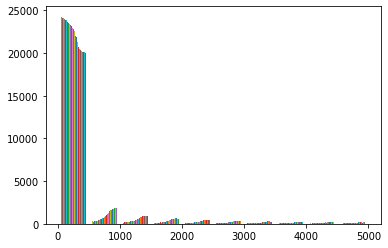

In [22]:
plt.hist(x_train)
plt.show()

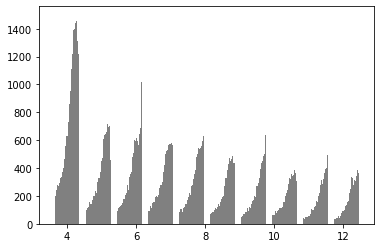

In [27]:
plt.hist(x_train, range=[4, 13], facecolor='gray', align='left')
plt.show()

(array([15.,  9.,  0.,  3.,  0.,  2.,  3.,  0.,  1.,  0.]),
 array([ 4. ,  4.6,  5.2,  5.8,  6.4,  7. ,  7.6,  8.2,  8.8,  9.4, 10. ]),
 <BarContainer object of 10 artists>)

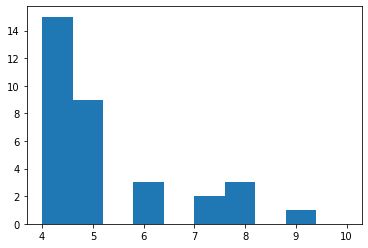

In [24]:
plt.hist(x_train[0], range=[4,10])

As we already know, we have 12500 reviews which are negative (0) and 12500 positive reviews (1):

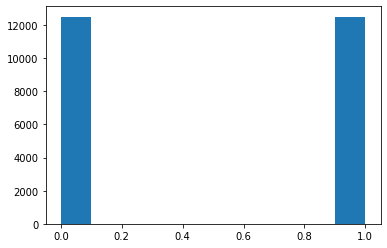

In [25]:
plt.hist(y_train)
plt.show()